## <center> Go to piazza and open today's lecture notes in the hub! </center>
## <center> https://piazza.com/class/jzioyk40mhs6r2 </center>
## <center> Let's go to tophat for attendance! </center>
## <center> https://app.tophat.com/e/245218 </center>

# Dimensionality reduction, and feature engineering
- Mud card
- PCA
- feature engineering
- overview of what we learnt so far


# <font color='LIGHTGRAY'>Dimensionality reduction, and feature engineering
- **Mud card**
- <font color='LIGHTGRAY'>PCA</font>
- <font color='LIGHTGRAY'>feature engineering</font>
- <font color='LIGHTGRAY'>overview of what we learnt so far</font>


## <center>Mud card</center>
- **What is the meaning of f in f regression?**
   - [f test](https://en.wikipedia.org/wiki/F-test)
- **Selectkbest question, can we examine the best feature from p value , or f test score?**

In [1]:
import pandas as pd
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/house_price_prep_imputed_1.csv')
y = df['SalePrice'].values # the target variable
df.drop(columns=['SalePrice'],inplace=True)
X = df.values # the feature matrix
feature_names = df.columns # feature names
f_test, p_values = f_regression(X, y)

Index(['OverallQual', 'GrLivArea', 'ExterQual'], dtype='object')
Index(['OverallQual', 'GrLivArea', 'ExterQual'], dtype='object')


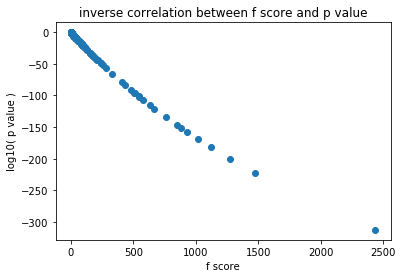

In [2]:
print(feature_names[np.argsort(p_values)[:3]]) # small p value means more important features
print(feature_names[np.argsort(f_test)[:-4:-1]]) # large f score means more important features

plt.scatter(f_test,np.log10(p_values))
plt.xlabel('f score')
plt.ylabel('log10( p value )')
plt.title('inverse correlation between f score and p value')
plt.savefig('figures/pval_fscore.png',dpi=300)
plt.show()

# <font color='LIGHTGRAY'>Dimensionality reduction, and feature engineering
- <font color='LIGHTGRAY'>Mud card</font>
- **PCA**
- <font color='LIGHTGRAY'>feature engineering</font>
- <font color='LIGHTGRAY'>overview of what we learnt so far</font>


## <center>PCA revisited</center>
- PCA converts a set of possibly correlated features into a set of linearly uncorrelated variables. The axes of the new coordinate system are the principal components.

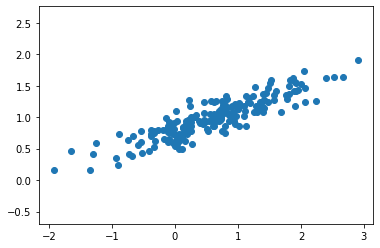

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
np.random.seed(1)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T + np.random.rand(2)
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
plt.show()

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print('corr matrix of X:')
print(np.corrcoef(X,rowvar=False))
print('covariance matrix of X:')
print(np.cov(X,rowvar=False))
print('corr matrix of X_pca:')
print(np.corrcoef(X_pca,rowvar=False))
print('covariance matrix of X_pca:')
print(np.cov(X_pca,rowvar=False))
print('explained variances of PCs:')
print(pca.explained_variance_)
print('explained variance ratios of PCs:')
print(pca.explained_variance_ratio_)

corr matrix of X:
[[1.         0.88938995]
 [0.88938995 1.        ]]
covariance matrix of X:
[[0.68217761 0.23093475]
 [0.23093475 0.09883179]]
corr matrix of X_pca:
[[1.00000000e+00 1.37071535e-17]
 [1.37071535e-17 1.00000000e+00]]
covariance matrix of X_pca:
[[7.62531501e-01 1.62705571e-18]
 [1.62705571e-18 1.84778955e-02]]
explained variances of PCs:
[0.7625315 0.0184779]
explained variance ratios of PCs:
[0.97634101 0.02365899]


## <center>PCA revisited</center>
How many principal components should I choose?

In [5]:
# let's apply PCA to the house price dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv('data/house_price_prep_imputed_1.csv')
# save and drop the target variable - PCA should only be applied to the feature matrix!
y = df['SalePrice']
df.drop(columns=['SalePrice'],inplace=True)

pca = PCA(n_components=df.shape[1]) # keep all components
X_pca = pca.fit(df)

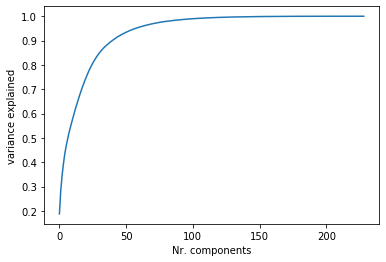

In [6]:
# how much variance is retained?
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nr. components')
plt.ylabel('variance explained')
plt.show()

In [7]:
print(np.cumsum(pca.explained_variance_ratio_))
print(sum(np.cumsum(pca.explained_variance_ratio_) < 0.95)+1)

[0.18744899 0.28360746 0.34530813 0.39313805 0.43311386 0.46500937
 0.4914974  0.51708903 0.53895124 0.55993898 0.58043401 0.60054967
 0.61992591 0.63806161 0.6560215  0.67292326 0.68940264 0.70553067
 0.72082832 0.73484684 0.74838751 0.76174333 0.77475923 0.78635676
 0.79740704 0.80762559 0.81725804 0.82619013 0.83468618 0.84243676
 0.8499227  0.85677408 0.86289204 0.8688436  0.87431632 0.87946223
 0.88418765 0.8888552  0.8933871  0.897663   0.90186692 0.90573772
 0.90951992 0.91319983 0.9167214  0.92000577 0.92311122 0.92602569
 0.92886176 0.93162916 0.93428849 0.93691215 0.93948571 0.94176475
 0.9439697  0.94608731 0.94809232 0.9500345  0.95194719 0.95370676
 0.95542914 0.95706383 0.95865533 0.96019843 0.96169436 0.96309219
 0.9644641  0.96580501 0.96710217 0.96834526 0.9695302  0.97067837
 0.97180009 0.97287632 0.97386208 0.97482441 0.9757656  0.976634
 0.97749175 0.97827715 0.97902744 0.97976613 0.98045109 0.98113286
 0.98180202 0.98244052 0.98307144 0.98367449 0.98424992 0.984815

## <center>PCA revisited</center>
- PCA can be thought of as fitting a p-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component

In [8]:
# https://matplotlib.org/3.1.1/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax=None, n_std=3.0, facecolor='none', edgecolor='red', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        edgecolor=edgecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    
    ax = ax or plt.gca()
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
np.random.seed(1)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T + np.random.rand(2)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

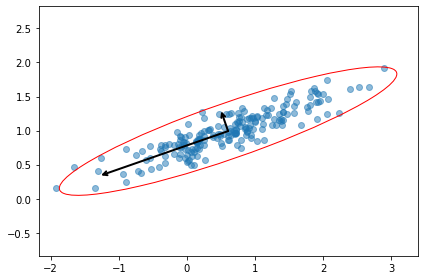

In [11]:
plt.scatter(X[:, 0], X[:, 1],alpha=0.5)
confidence_ellipse(X[:, 0], X[:, 1]) # fit and plot the ellipse
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.tight_layout()
plt.show()

# <font color='LIGHTGRAY'>Dimensionality reduction, and feature engineering
- <font color='LIGHTGRAY'>Mud card</font>
- <font color='LIGHTGRAY'>PCA</font>
- **feature engineering**
- <font color='LIGHTGRAY'>overview of what we learnt so far</font>


## Feature engineering

Automatic feature engineering:
- combine features in a simple and automatic way (PolynomialFeatures method in sklearn)
- if n_ftrs << n_points, this can modestly improve the predictive power of your model 

Manual feature engineering:
- costly, difficult, project-specific, and requires domain knowledge of the data
- it can boost the predictive power of your model!

### Automatic feature engineering

In [12]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3, 2)
print(X)

poly = PolynomialFeatures(2)
print(poly.fit_transform(X)) # [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2, include_bias=False)
print(poly.fit_transform(X)) # [a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2,interaction_only=True, include_bias=False)
print(poly.fit_transform(X)) # [a, b, ab]

[[0 1]
 [2 3]
 [4 5]]
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
[[ 0.  1.  0.  0.  1.]
 [ 2.  3.  4.  6.  9.]
 [ 4.  5. 16. 20. 25.]]
[[ 0.  1.  0.]
 [ 2.  3.  6.]
 [ 4.  5. 20.]]


### Manual feature engineering

Some advice:
- EDA can give you insights on how you should engineer and preprocess your features better
- Example from HW2:

<center><img src="figures/hw2_fig.png" width="600"></center>

Some advice:

- non-linear transformations can be helpful
   - e.g., time series data and seasonal variations

<center><img src="figures/date_transform.png" width="600"></center>

# <font color='LIGHTGRAY'>Dimensionality reduction, and feature engineering</font>
- <font color='LIGHTGRAY'>Mud card</font>
- <font color='LIGHTGRAY'>PCA</font>
- <font color='LIGHTGRAY'>feature engineering</font>
- **overview of what we learnt so far**


## Overview of what we learnt so far

- pandas
   - how to read in and manipulate data in python
- Preprocessing with sklearn
   - data needs to be prepared because ML models require numerical inputs in a specific format
      - X feature matrix:
         - only ints and floats, no NaNs, feature values on the order of unity (scaled)
      - y target variable:
         - ints (classification) or floats (regression)
   - preprocessing tools
      - encoders: one-hot or ordinal
         - prepares categorical and ordinal features
      - scalers: min-max or standard
         - prepares continuouos features
      - label encoder:
         - prepares the classification labels, values need to be between 0 and n_classes - 1
   - missing data - more on this in november
      - MCAR, MAR, MNAR
      - if mcar p value is > 0.05, drop the rows or columns with missing values or use multivariate imputation
      - if mcar p value is < 0.05, use multivariate imputation

- EDA with matplotlib
   - visualize your data to gain a deeper understanding of it
   - list of visualization types we covered:
      - bar and stacked bar plots: visualize a categorical feature or the classification label
      - histogram: visualize a continuous feature or the regression target variable
      - overlapping histograms, violin plot, box plot: visualize interactions between a continuous feature and a categorical feature or classficiation label
      - scatter plot, heatmap: visualize interactions between a continuous feature and a continuous feature or a regression target variable
      - visualize the correlation coefficient or other matrices with matshow
      - scatter matrix
   
- other topics we touched on
   - feature selection before ML - more on this in November
   - dimensionality reduction
   - feature engineering

## Where are we in the supervised ML pipeline?
- data is in a pandas data frame
- features are preprocessed, visualized and understood
- labels are preprocessed if necessary
- missing values have been dealt with
- features were selected or engineered

## What's next?
- decide what metric we will use to evaluate the supervised ML model (2 lectures)
- learn about the various supervised ML models and their hyperparameters (2 lectures)
- put together the hyper parameter tuning and cross-validation pipeline (2 lectures)
- train your model and interpret it (in November)
